In [7]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from nmc_met_io.retrieve_cassandraDB  import *

xr.set_options(display_style="text")

## 1.1 读取多个时次的模式预报数据 TEMP

In [9]:
%time
directory850 = "ECMWF_HR/TMP/850"
directory500 = "ECMWF_HR/TMP/500"
directoryCAPE = "ECMWF_HR/CAPE"
fhours = np.arange(12, 96, 6)
filenames = ['22062920.'+'%03d'%(fhour) for fhour in fhours]
T850 = get_model_grids(directory850, filenames, varname='T', varattrs={'long_name':'850hPa T', 'units':'℃'}, cache=False)
T500 = get_model_grids(directory500, filenames, varname='T', varattrs={'long_name':'500hPa T', 'units':'℃'}, cache=False)

CAPE = get_model_grids(directoryCAPE, filenames, varname='cape', varattrs={'long_name':'CAPE', 'units':'J/kg'}, cache=False)

CAPE

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


<xarray.Dataset>
Dimensions:                  (time: 14, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-30T08:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  datetime64[ns] 2022-06-29T20:00:00
    forecast_period          (time) float64 12.0 18.0 24.0 ... 78.0 84.0 90.0
Data variables:
    cape                     (time, lat, lon) float32 1.25 1.0 ... 6.125 6.5
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

In [10]:
T850

<xarray.Dataset>
Dimensions:                  (time: 14, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-30T08:00:00 ... 20...
  * level                    (level) float32 850.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-29T20:00:00
    forecast_period          (time) float64 12.0 18.0 24.0 ... 78.0 84.0 90.0
Data variables:
    T                        (time, level, lat, lon) float32 14.57 ... 9.81
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

Frozen({'time': 14, 'lat': 120, 'lon': 120})
<xarray.DataArray 'cape' (time: 14, lat: 120, lon: 120)>
array([[[2.935000e+02, 1.787500e+02, 1.612500e+02, ..., 2.057500e+02,
         1.890000e+02, 1.935000e+02],
        [2.720000e+02, 2.370000e+02, 1.925000e+02, ..., 2.885000e+02,
         2.550000e+02, 2.612500e+02],
        [2.210000e+02, 2.080000e+02, 2.197500e+02, ..., 2.402500e+02,
         2.185000e+02, 2.585000e+02],
        ...,
        [1.017500e+02, 1.277500e+02, 1.687500e+02, ..., 1.166750e+03,
         8.462500e+02, 9.945000e+02],
        [1.902500e+02, 1.475000e+02, 1.332500e+02, ..., 8.487500e+02,
         7.605000e+02, 4.770000e+02],
        [3.250000e+01, 1.037500e+02, 1.742500e+02, ..., 3.845000e+02,
         5.250000e+02, 1.937500e+02]],

       [[2.572500e+02, 2.232500e+02, 1.850000e+02, ..., 1.933750e+02,
         5.016250e+02, 6.270000e+02],
        [1.725000e+02, 9.040000e+02, 6.012500e+02, ..., 2.652500e+02,
         5.033750e+02, 5.755000e+02],
        [1.786125e+

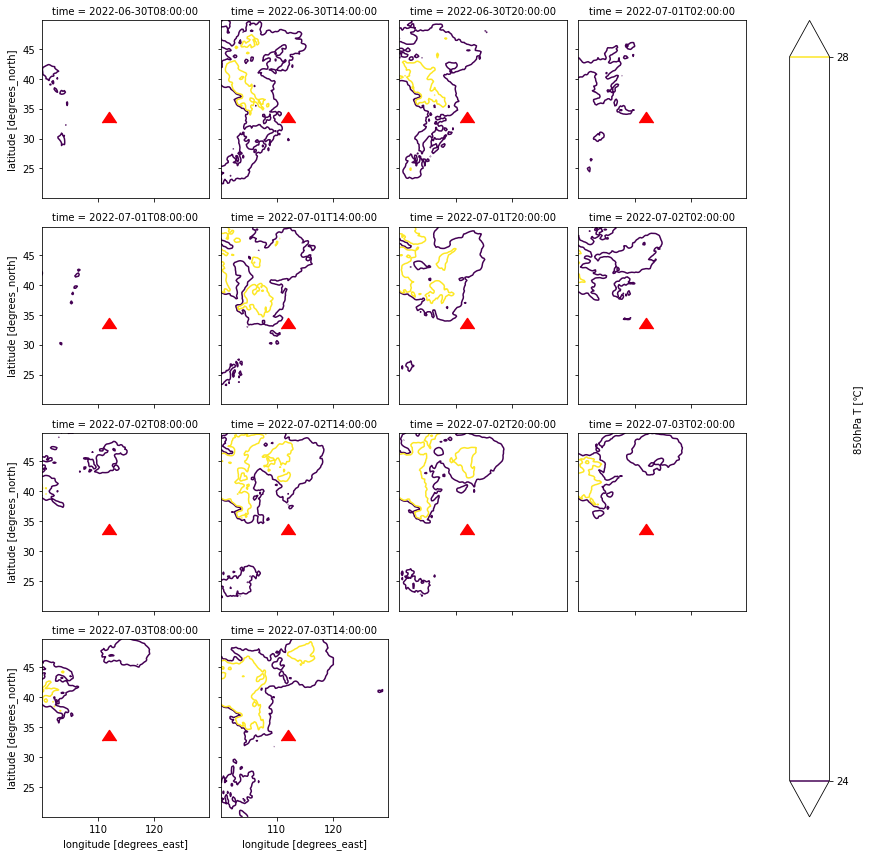

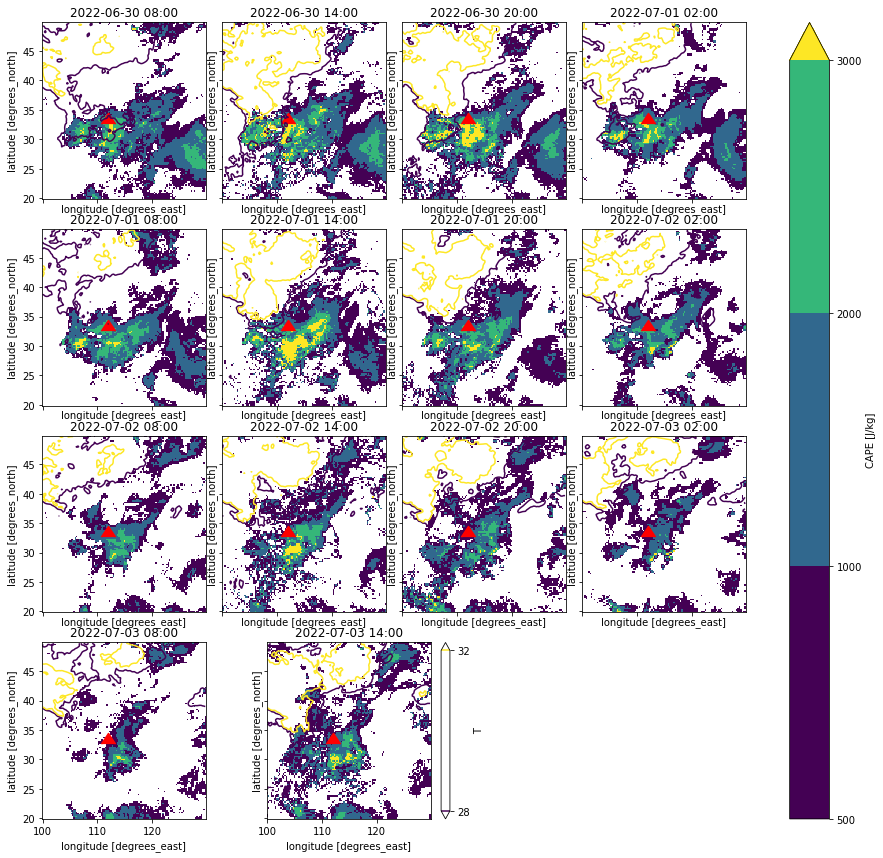

In [11]:
# 绘制图像
T850 = T850.T.isel(level=0).sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
p = T850.plot.contour(col='time', col_wrap=4, levels=[24, 28],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)


T500 = T500.T.isel(level=0).sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
T850_500 = T850 - T500
#print(T850_500)
print(T850_500.sizes)

CAPE = CAPE.cape.sel(lon=np.arange(100,130,0.25),lat=np.arange(20,50,0.25), method="nearest")
print(CAPE)

p = CAPE.plot(col='time', col_wrap=4, levels=[500,1000,2000,3000], extend='max', add_colorbar=True)
#p = T850_500.plot.contour(col='time', col_wrap=4, levels=[28, 32],add_colorbar=True)

titles = T850_500.coords['time'].dt.strftime("%Y-%m-%d %H:%M").values

index = 0
for ax in p.axes.flat:
    if(index < T850_500.sizes['time']):
        add_colorbar = (index == T850_500.sizes['time'] - 1)
        T850_500.isel(time=index).plot.contour(ax=ax, levels=[28, 32], add_colorbar = add_colorbar)
        ax.set_title(titles[index])
        index = index + 1
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

In [12]:
T850_500.coords['time'].dt.strftime("%Y-%m-%d %H:%M").values

array(['2022-06-30 08:00', '2022-06-30 14:00', '2022-06-30 20:00',
       '2022-07-01 02:00', '2022-07-01 08:00', '2022-07-01 14:00',
       '2022-07-01 20:00', '2022-07-02 02:00', '2022-07-02 08:00',
       '2022-07-02 14:00', '2022-07-02 20:00', '2022-07-03 02:00',
       '2022-07-03 08:00', '2022-07-03 14:00'], dtype=object)